In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, TFRobertaForSequenceClassification
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import string

2024-03-16 21:36:10.793125: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 21:36:10.823494: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-16 21:36:10.823516: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-16 21:36:10.824256: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-16 21:36:10.828871: I external/local_tsl/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2024-03-16 21:36:10.829391: I tensorflow/core/platform/cpu_feature_guard.cc:1

In [2]:
df=pd.read_csv('one_output_dataset_new.csv')
df

,speech,emotion
0,From the moment that the French defenses at Se...,trust
1,"Five score years ago, a great American, in who...",anticipation
2,The media will not show the magnitude of this ...,anger
3,"Madam Vice President, my fellow Americans: to ...",disgust
4,"My German countrymen, men and women, (long pau...",anger
5,We observe today not a victory of party but a ...,joy
6,"Your Majesties, Your Highnesses, Distinguished...",trust
7,I am honored to be with you today at your comm...,anticipation
8,"Honorable UN Secretary General Mr Ban Ki-moon,...",sadness
9,It is with a profound sense of humility that I...,sadness


In [3]:
dict={'anger':0.0, 'joy':1.0, 'trust':2.0, 'anticipation':3.0, 'sadness':4.0, 'fear':5.0, 'disgust':6.0}
df=df.replace(dict)
df['emotion'] = df['emotion'].apply(pd.to_numeric)
df

,speech,emotion
0,From the moment that the French defenses at Se...,2.0
1,"Five score years ago, a great American, in who...",3.0
2,The media will not show the magnitude of this ...,0.0
3,"Madam Vice President, my fellow Americans: to ...",6.0
4,"My German countrymen, men and women, (long pau...",0.0
5,We observe today not a victory of party but a ...,1.0
6,"Your Majesties, Your Highnesses, Distinguished...",2.0
7,I am honored to be with you today at your comm...,3.0
8,"Honorable UN Secretary General Mr Ban Ki-moon,...",4.0
9,It is with a profound sense of humility that I...,4.0


# New Section

In [4]:
#preprocess transcript

# download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# initialize a PorterStemmer
stemmer = PorterStemmer()

def preprocess_text(text):
    # lowercase the text
    text = text.lower()
    # remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # tokenize the text
    words = word_tokenize(text)
    # remove stopwords and stem the words
    words = [stemmer.stem(word) for word in words if word not in stopwords.words('english')]
    # join the words back into a string
    text = ' '.join(words)

    return text

df['speech'] = df['speech'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /home/arjun/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/arjun/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [5]:
!pip install sentencepiece

/usr/bin/zsh: /home/arjun/miniconda3/envs/ml/lib/libncursesw.so.6: no version information available (required by /usr/bin/zsh)

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: pip install --upgrade pip


In [6]:
tokenizer=AutoTokenizer.from_pretrained("SamLowe/roberta-base-go_emotions")
model=TFRobertaForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

2024-03-16 21:36:26.555476: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-16 21:36:26.556371: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on anothe

In [7]:
df


,speech,emotion
0,moment french defens sedan meus broken end sec...,2.0
1,five score year ago great american whose symbo...,3.0
2,media show magnitud crowd even turn today look...,0.0
3,madam vice presid fellow american state obviou...,6.0
4,german countrymen men women long paus chang go...,0.0
5,observ today victori parti celebr freedomsymbo...,1.0
6,majesti high distinguish guest comrad friend t...,2.0
7,honor today commenc one finest univers world n...,3.0
8,honor un secretari gener mr ban kimoon respect...,4.0
9,profound sens humil accept honor chosen bestow...,4.0


In [8]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [9]:
#split in train and test in text and labels
train_texts = train['speech'].tolist()
train_labels = train['emotion'].tolist()

test_texts = test['speech'].tolist()
test_labels = test['emotion'].tolist()

In [10]:
#tokenize the texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=512)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=512)

In [11]:
#convert features and labels to tensors for both train and test
train_features = {key: tf.convert_to_tensor(val) for key, val in train_encodings.items()}
train_labels = tf.convert_to_tensor(train_labels)

test_features = {key: tf.convert_to_tensor(val) for key, val in test_encodings.items()}
test_labels = tf.convert_to_tensor(test_labels)

In [12]:
#prepare the training and testing dataset
train_dataset = tf.data.Dataset.from_tensor_slices((train_features, train_labels))
train_dataset = train_dataset.shuffle(10000).batch(1)

test_dataset = tf.data.Dataset.from_tensor_slices((test_features, test_labels))
test_dataset = test_dataset.batch(1)

In [13]:
#define model metrics
from tensorflow import keras
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5)
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
metrics = ['accuracy']

In [14]:
model.compile(optimizer=optimizer, loss=loss, metrics=metrics)

In [15]:
model.summary()

Model: "tf_roberta_for_sequence_classification"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 roberta (TFRobertaMainLaye  multiple                  124055040 
 r)                                                              
                                                                 
 classifier (TFRobertaClass  multiple                  612124    
 ificationHead)                                                  
                                                                 
Total params: 124667164 (475.57 MB)
Trainable params: 124667164 (475.57 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [16]:
train_labels

<tf.Tensor: shape=(11,), dtype=float32, numpy=array([1., 3., 2., 3., 1., 3., 5., 0., 2., 2., 6.], dtype=float32)>

In [17]:
#fit model to train dataset
model.fit(train_dataset, epochs=15, validation_data=test_dataset)

Epoch 1/15
11/11 [==============================] - 59s 4s/step - loss: 4.7072 - accuracy: 0.0909 - val_loss: 4.7230 - val_accuracy: 0.0000e+00
Epoch 2/15
11/11 [==============================] - 36s 3s/step - loss: 2.4416 - accuracy: 0.1818 - val_loss: 5.2077 - val_accuracy: 0.0000e+00
Epoch 3/15
11/11 [==============================] - 35s 3s/step - loss: 2.0985 - accuracy: 0.1818 - val_loss: 4.8220 - val_accuracy: 0.0000e+00
Epoch 4/15
11/11 [==============================] - 34s 3s/step - loss: 1.4188 - accuracy: 0.4545 - val_loss: 5.3458 - val_accuracy: 0.0000e+00
Epoch 5/15
11/11 [==============================] - 34s 3s/step - loss: 1.0927 - accuracy: 0.6364 - val_loss: 5.6007 - val_accuracy: 0.0000e+00
Epoch 6/15
11/11 [==============================] - 30s 3s/step - loss: 0.5129 - accuracy: 0.8182 - val_loss: 5.4573 - val_accuracy: 0.0000e+00
Epoch 7/15
11/11 [==============================] - 30s 3s/step - loss: 0.2952 - accuracy: 0.9091 - val_loss: 5.6996 - val_accuracy: 0.0

In [18]:
model.save_weights('roberta_go_model_15epochs.h5')

In [19]:
new_model=TFRobertaForSequenceClassification.from_pretrained("SamLowe/roberta-base-go_emotions")

'(ReadTimeoutError("HTTPSConnectionPool(host='huggingface.co', port=443): Read timed out. (read timeout=10)"), '(Request ID: af890f43-bd80-483f-99c5-2fddb6a8e7d6)')' thrown while requesting HEAD https://huggingface.co/SamLowe/roberta-base-go_emotions/resolve/main/config.json
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFRobertaForSequenceClassification: ['roberta.embeddings.position_ids']
- This IS expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFRobertaForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFRobertaForSequenceClassification were initialized from t

In [20]:
new_model.load_weights('roberta_go_model_15epochs.h5')

In [14]:
df['speech'][2]

'media show magnitud crowd even turn today look saw thousand peopl ’ see hundr thousand peopl behind ’ want show hundr thousand peopl want recogn fake news media turn camera pleas show ’ realli happen peopl go take longer ’ go take longer go ahead turn camera pleas would show came world actual came countri realli want see want see cover ’ never seen anyth like would realli great could cover fairli media media biggest problem far ’ concern singl biggest problem fake news big tech big tech come beat four year ago surpris took surpris year rig elect rig like ’ never rig elect way last night ’ bad job either notic ’ honest want thank ’ great honor kind crowd hundr thousand american patriot commit honesti elect integr gloriou republ us today want see elect victori stolen embolden radic left democrat ’ stolen fake news media ’ ’ done ’ never give never conced ’ happen ’ conced ’ theft involv donald trump 0442 countri enough take anymor ’ use favorit term peopl realli came stop steal today la

In [47]:
new_feature = tokenizer(df['speech'][9], truncation=True, padding=True, return_tensors='tf')

In [48]:
predictions = new_model(new_feature)

In [49]:
predictions

TFSequenceClassifierOutput(loss=None, logits=<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[-2.9816113, -5.145647 , -4.4226794, -3.0032942,  1.1485186,
        -3.4937344, -3.0204716, -4.6419854, -6.758581 , -5.943504 ,
        -4.0906286, -4.8644805, -6.0789547, -5.9933467, -3.908621 ,
        -4.9299016, -7.4755077, -5.997533 , -5.285138 , -5.4682746,
        -5.5212655, -6.623746 , -4.4897084, -6.1963825, -7.0786285,
        -5.9929347, -7.5903897, -4.068809 ]], dtype=float32)>, hidden_states=None, attentions=None)

In [50]:
probabilities = tf.nn.softmax(predictions.logits, axis=-1)

In [51]:
probabilities

<tf.Tensor: shape=(1, 28), dtype=float32, numpy=
array([[1.4602942e-02, 1.6773032e-03, 3.4561488e-03, 1.4289719e-02,
        9.0809852e-01, 8.7504052e-03, 1.4046352e-02, 2.7755499e-03,
        3.3428986e-04, 7.5527787e-04, 4.8172618e-03, 2.2218802e-03,
        6.5960089e-04, 7.1855547e-04, 5.7789008e-03, 2.0811751e-03,
        1.6321721e-04, 7.1555376e-04, 1.4589197e-03, 1.2147761e-03,
        1.1520798e-03, 3.8254401e-04, 3.2320800e-03, 5.8652018e-04,
        2.4273276e-04, 7.1885157e-04, 1.4550339e-04, 4.9235276e-03]],
      dtype=float32)>

In [52]:
np_probabilities=probabilities.numpy()

In [53]:
np_probabilities

array([[1.4602942e-02, 1.6773032e-03, 3.4561488e-03, 1.4289719e-02,
        9.0809852e-01, 8.7504052e-03, 1.4046352e-02, 2.7755499e-03,
        3.3428986e-04, 7.5527787e-04, 4.8172618e-03, 2.2218802e-03,
        6.5960089e-04, 7.1855547e-04, 5.7789008e-03, 2.0811751e-03,
        1.6321721e-04, 7.1555376e-04, 1.4589197e-03, 1.2147761e-03,
        1.1520798e-03, 3.8254401e-04, 3.2320800e-03, 5.8652018e-04,
        2.4273276e-04, 7.1885157e-04, 1.4550339e-04, 4.9235276e-03]],
      dtype=float32)

In [54]:
prob=np_probabilities.tolist()[0]

In [55]:
prob

[0.014602942392230034,
 0.0016773032257333398,
 0.003456148784607649,
 0.014289719052612782,
 0.9080985188484192,
 0.00875040516257286,
 0.014046352356672287,
 0.00277554988861084,
 0.0003342898562550545,
 0.0007552778697572649,
 0.004817261826246977,
 0.0022218802478164434,
 0.000659600889775902,
 0.000718555471394211,
 0.005778900813311338,
 0.0020811751019209623,
 0.0001632172061363235,
 0.0007155537605285645,
 0.0014589197235181928,
 0.0012147760717198253,
 0.0011520797852426767,
 0.00038254400715231895,
 0.0032320800237357616,
 0.0005865201819688082,
 0.00024273275630548596,
 0.0007188515737652779,
 0.0001455033925594762,
 0.004923527594655752]

In [56]:
max_two=[prob.index(x) for x in sorted(prob, reverse=True)[:2]]
max_two

[4, 0]

In [38]:
indices_to_emotion={0:'anger', 1:'joy', 2:'trust', 3:'anticipation',4:'sadness',5:'fear',6:'disgust'}

In [39]:
emotion1=indices_to_emotion[max_two[0]]
emotion2=indices_to_emotion[max_two[1]]

In [40]:
primary_dyads = {('joy','trust'): 'love', ('fear','trust'): 'submission', ('fear','surprise'): 'alarm',
                 ('sadness','surprise'): 'disappointment', ('disgust','sadness'): 'remorse', ('anger','disgust'): 'contempt',
                 ('anger','anticipation'): 'aggressiveness', ('anticipation','joy'): 'optimism'}

secondary_dyads = {('anticipation','trust'):'hope',('fear','joy'):'guilt',('surprise','trust'):'curiosity',('fear','sadness'):'dispair',
                   ('anger','sadness'):'envy',('anticipation','disgust'):'cynism',('anger','joy'):'pride'}

tertiary_dyads = {('anger','trust'):'dominance',('anticipation','fear'):'anxiety',('joy','surprise'):'delight',
                  ('sadness','trust'):'sentimentality',('disgust','fear'):'shame',('anger','surprise'):'outrage',
                  ('anticipation','sadness'):'pessimism',('disgust','joy'):'morbidness'}

opposite_dyads = {('joy','sadness'):'bittersweetness',('disgust','trust'):'ambivalence',('anger','fear'):'frozenness',
                  ('anticipation','surprise'):'confusion'}
plutchik_wheel = ['joy', 'trust', 'fear', 'surprise', 'sadness', 'disgust', 'anger', 'anticipation']

In [41]:
def find_state(emotion1, emotion2):
    if emotion1<emotion2:
        emo1=emotion1
        emo2=emotion2
    else:
        emo1=emotion2
        emo2=emotion1
    index1=plutchik_wheel.index(emo1)
    index2=plutchik_wheel.index(emo2)
    distance=abs(index1-index2) % 8

    if distance>4:
        distance=8-distance
    if distance==1:
        print(primary_dyads[(emo1, emo2)])
    elif distance==2:
        print(secondary_dyads[(emo1, emo2)])
    elif distance==3:
        print(tertiary_dyads[(emo1, emo2)])
    elif distance==4:
        print(opposite_dyads[(emo1, emo2)])
    else:
        print("error")

In [42]:
find_state(emotion1, emotion2)

aggressiveness


<Axes: >

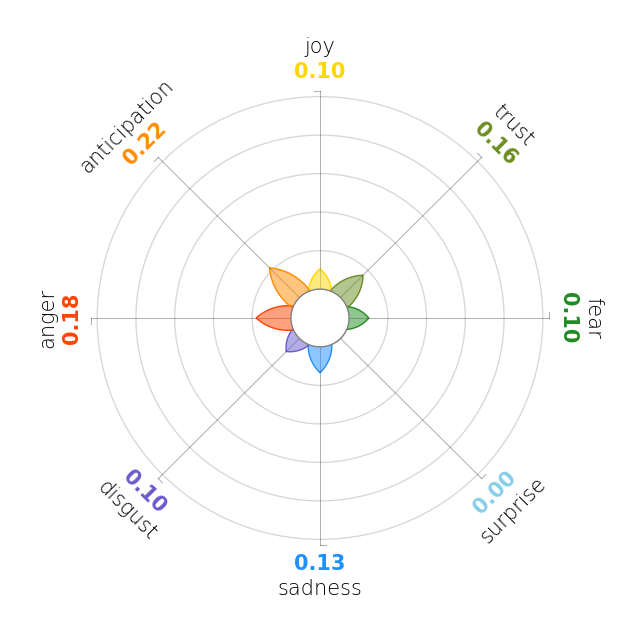

In [43]:
#plot wheel
from pyplutchik import plutchik
emotions={
    'joy':prob[1],
    'trust':prob[2],
    'fear':prob[5],
    'surprise':0,
    'sadness':prob[4],
    'disgust':prob[6],
    'anger':prob[0],
    'anticipation':prob[3]
}
plutchik(emotions)

In [22]:
test_results = {}

test_results['model'] = model.evaluate(
    train_features, train_labels, verbose=0)

print(f" Accuracy: {test_results}")

 Accuracy: {'model': [0.10719717293977737, 1.0]}


In [59]:
model.predict(test_features)

1/1 [==============================] - 3s 3s/step


TFSequenceClassifierOutput(loss=None, logits=array([[-2.0886822 , -0.68211037, -2.0695648 , -1.5220561 , -3.3068013 ,
        -3.9501617 , -4.2687874 , -5.0835834 , -5.23907   , -5.2923403 ,
        -4.61742   , -5.19663   , -6.4556255 , -5.2728953 , -7.3247614 ,
        -6.4844604 , -7.278107  , -2.7757201 , -4.9888887 , -6.550074  ,
        -6.1120405 , -6.342682  , -5.757272  , -6.7677445 , -7.7105784 ,
        -5.526007  , -7.2528996 , -4.311238  ],
       [-0.02955658, -5.024634  , -2.425058  , -2.234465  , -1.4495924 ,
        -2.9225805 , -3.5708928 , -4.660211  , -6.741105  , -5.645524  ,
        -4.03358   , -5.4304805 , -7.0226426 , -6.1149364 , -6.544037  ,
        -5.1971006 , -7.549796  , -5.57464   , -3.792236  , -6.806533  ,
        -5.77519   , -6.4063954 , -5.805564  , -7.1647754 , -7.799985  ,
        -6.102068  , -7.5176353 , -4.606337  ],
       [-3.6221864 , -1.9485664 , -1.7219267 , -2.3343668 , -3.0139532 ,
         0.80949306, -3.6683538 , -4.468814  , -4.62323 

In [30]:
from sklearn.metrics import classification_report

In [38]:
pred = new_model.predict(test_features, verbose=1)
pred

1/1 [==============================] - 2s 2s/step


TFSequenceClassifierOutput(loss=None, logits=array([[-4.8574266 , -4.705292  , -0.31210148, -1.8045306 , -4.6179347 ,
        -3.6691163 , -2.6248677 , -4.451815  , -6.691037  , -5.463469  ,
        -3.9925892 , -5.1185308 , -6.6771507 , -6.8197823 , -5.346372  ,
        -6.9718943 , -7.5991106 , -6.5793076 , -6.1020155 , -6.4470167 ,
        -5.614679  , -7.9332867 , -6.1585803 , -8.41181   , -7.620013  ,
        -5.552787  , -7.0779905 , -3.6663377 ],
       [-4.332655  , -4.383984  , -2.7910316 , -2.7034938 , -3.011818  ,
        -2.9767678 ,  0.04758678, -3.2216103 , -6.457123  , -5.4549165 ,
        -3.4669788 , -5.1078234 , -5.711306  , -5.9575806 , -2.3346188 ,
        -5.9198704 , -6.827373  , -5.5454946 , -5.0565615 , -3.8274074 ,
        -5.284352  , -7.2601094 , -4.7640543 , -6.8248744 , -6.8324747 ,
        -5.4056354 , -6.6975765 , -3.7115452 ],
       [-3.6221864 , -1.9485664 , -1.7219267 , -2.3343668 , -3.0139532 ,
         0.80949306, -3.6683538 , -4.468814  , -4.62323 

In [45]:
probabilities = tf.nn.softmax(pred.logits, axis=-1)
probabilities

<tf.Tensor: shape=(3, 28), dtype=float32, numpy=
array([[6.9780187e-03, 8.1246244e-03, 6.5726697e-01, 1.4777061e-01,
        8.8662943e-03, 2.2898598e-02, 6.5060928e-02, 1.0468560e-02,
        1.1153346e-03, 3.8065477e-03, 1.6570147e-02, 5.3744754e-03,
        1.1309307e-03, 9.8060002e-04, 4.2794286e-03, 8.4222964e-04,
        4.4981498e-04, 1.2471789e-03, 2.0100833e-03, 1.4235802e-03,
        3.2723646e-03, 3.2203505e-04, 1.8995393e-03, 1.9956441e-04,
        4.4051025e-04, 3.4812968e-03, 7.5744919e-04, 2.2962311e-02],
       [8.3593419e-03, 7.9410905e-03, 3.9056268e-02, 4.2629268e-02,
        3.1318750e-02, 3.2435942e-02, 6.6755486e-01, 2.5391756e-02,
        9.9891250e-04, 2.7213232e-03, 1.9866923e-02, 3.8505318e-03,
        2.1058698e-03, 1.6461745e-03, 6.1646476e-02, 1.7094372e-03,
        6.8981049e-04, 2.4856646e-03, 4.0530642e-03, 1.3854742e-02,
        3.2274192e-03, 4.4750181e-04, 5.4302239e-03, 6.9153623e-04,
        6.8630028e-04, 2.8587927e-03, 7.8541588e-04, 1.5556673e-02

In [46]:
np_probabilities=probabilities.numpy()
np_probabilities

array([[6.9780187e-03, 8.1246244e-03, 6.5726697e-01, 1.4777061e-01,
        8.8662943e-03, 2.2898598e-02, 6.5060928e-02, 1.0468560e-02,
        1.1153346e-03, 3.8065477e-03, 1.6570147e-02, 5.3744754e-03,
        1.1309307e-03, 9.8060002e-04, 4.2794286e-03, 8.4222964e-04,
        4.4981498e-04, 1.2471789e-03, 2.0100833e-03, 1.4235802e-03,
        3.2723646e-03, 3.2203505e-04, 1.8995393e-03, 1.9956441e-04,
        4.4051025e-04, 3.4812968e-03, 7.5744919e-04, 2.2962311e-02],
       [8.3593419e-03, 7.9410905e-03, 3.9056268e-02, 4.2629268e-02,
        3.1318750e-02, 3.2435942e-02, 6.6755486e-01, 2.5391756e-02,
        9.9891250e-04, 2.7213232e-03, 1.9866923e-02, 3.8505318e-03,
        2.1058698e-03, 1.6461745e-03, 6.1646476e-02, 1.7094372e-03,
        6.8981049e-04, 2.4856646e-03, 4.0530642e-03, 1.3854742e-02,
        3.2274192e-03, 4.4750181e-04, 5.4302239e-03, 6.9153623e-04,
        6.8630028e-04, 2.8587927e-03, 7.8541588e-04, 1.5556673e-02],
       [8.3738966e-03, 4.4644881e-02, 5.600154

In [48]:
predicted = np.amax(np_probabilities, axis=1)
# report = classification_report(np.argmax(test_labels, axis=1), predicted)
# print(report)

In [49]:
predicted

array([0.657267  , 0.66755486, 0.7040146 ], dtype=float32)

ValueError: Classification metrics can't handle a mix of binary and continuous targets